In [33]:
# Load Churn_Modeling.csv into a pandas DataFrame

import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,628.934283,France,Female,42.0,2,-2830.867964,1,1,1,99792.144004,1
1,2,15647311,Hill,605.234714,Spain,Female,41.0,1,80939.791602,1,0,1,114948.184589,0
2,3,15619304,Onio,514.953771,France,Female,NaN,8,159734.813842,3,1,0,110048.914519,1
3,4,15701354,Boni,729.460597,France,Female,39.0,1,-3838.914537,2,0,0,100167.237559,0
4,5,15737888,Mitchell,845.316933,Spain,Female,43.0,2,131368.276843,1,1,1,78882.038318,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9000 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [36]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.486080,38.897889,5.012800,76564.595235,1.530200,0.70550,0.515100,100051.884885,0.203700
std,2886.89568,7.193619e+04,98.663139,10.435037,2.892174,62742.184336,0.581654,0.45584,0.499797,57608.389232,0.402769
min,1.00000,1.556570e+07,323.379108,18.000000,0.000000,-25255.467927,1.000000,0.00000,0.000000,-7491.883375,0.000000
25%,2500.75000,1.562853e+07,582.380926,32.000000,3.000000,3591.048620,1.000000,0.00000,0.000000,50962.761768,0.000000
50%,5000.50000,1.569074e+07,651.357085,37.000000,5.000000,96078.412974,1.000000,1.00000,1.000000,100034.471006,0.000000
75%,7500.25000,1.575323e+07,718.821772,44.000000,7.000000,128045.204252,2.000000,1.00000,1.000000,149273.048741,0.000000
max,10000.00000,1.581569e+07,902.733383,92.000000,10.000000,252696.802656,4.000000,1.00000,1.000000,207020.371559,1.000000


In [37]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [38]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,9000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.486080,38.897889,5.012800,76564.595235,1.530200,0.70550,0.515100,100051.884885,0.203700
std,98.663139,10.435037,2.892174,62742.184336,0.581654,0.45584,0.499797,57608.389232,0.402769
min,323.379108,18.000000,0.000000,-25255.467927,1.000000,0.00000,0.000000,-7491.883375,0.000000
25%,582.380926,32.000000,3.000000,3591.048620,1.000000,0.00000,0.000000,50962.761768,0.000000
50%,651.357085,37.000000,5.000000,96078.412974,1.000000,1.00000,1.000000,100034.471006,0.000000
75%,718.821772,44.000000,7.000000,128045.204252,2.000000,1.00000,1.000000,149273.048741,0.000000
max,902.733383,92.000000,10.000000,252696.802656,4.000000,1.00000,1.000000,207020.371559,1.000000


In [39]:
# Convert negative EstimatedSalary values to positive

df['EstimatedSalary'] = df['EstimatedSalary'].abs()

In [40]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                1000
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [41]:
df = df.dropna()

In [42]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,650.511671,38.897889,5.006556,76472.457594,1.529778,0.707222,0.515000,99954.439820,0.202889
std,98.897395,10.435037,2.894343,62781.565285,0.582176,0.455063,0.499803,57572.428015,0.402173
min,323.379108,18.000000,0.000000,-25255.467927,1.000000,0.000000,0.000000,5.683817,0.000000
25%,582.369185,32.000000,2.000000,3513.316164,1.000000,0.000000,0.000000,50767.359027,0.000000
50%,651.195457,37.000000,5.000000,96031.067535,1.000000,1.000000,1.000000,99863.646300,0.000000
75%,719.046153,44.000000,7.000000,128042.938023,2.000000,1.000000,1.000000,149082.888093,0.000000
max,902.733383,92.000000,10.000000,252696.802656,4.000000,1.000000,1.000000,207020.371559,1.000000


In [43]:
# Cap credit score at 900
df['CreditScore'] = df['CreditScore'].clip(upper=900)

In [44]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,650.511207,38.897889,5.006556,76472.457594,1.529778,0.707222,0.515000,99954.439820,0.202889
std,98.896219,10.435037,2.894343,62781.565285,0.582176,0.455063,0.499803,57572.428015,0.402173
min,323.379108,18.000000,0.000000,-25255.467927,1.000000,0.000000,0.000000,5.683817,0.000000
25%,582.369185,32.000000,2.000000,3513.316164,1.000000,0.000000,0.000000,50767.359027,0.000000
50%,651.195457,37.000000,5.000000,96031.067535,1.000000,1.000000,1.000000,99863.646300,0.000000
75%,719.046153,44.000000,7.000000,128042.938023,2.000000,1.000000,1.000000,149082.888093,0.000000
max,900.000000,92.000000,10.000000,252696.802656,4.000000,1.000000,1.000000,207020.371559,1.000000


In [45]:
# Convert categorical Geography to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,628.934283,0,0,42.0,2,-2830.867964,1,1,1,99792.144004,1
1,605.234714,2,0,41.0,1,80939.791602,1,0,1,114948.184589,0
3,729.460597,0,0,39.0,1,-3838.914537,2,0,0,100167.237559,0
4,845.316933,2,0,43.0,2,131368.276843,1,1,1,78882.038318,0
5,640.317261,2,1,44.0,8,114536.196602,2,1,0,147245.293447,1


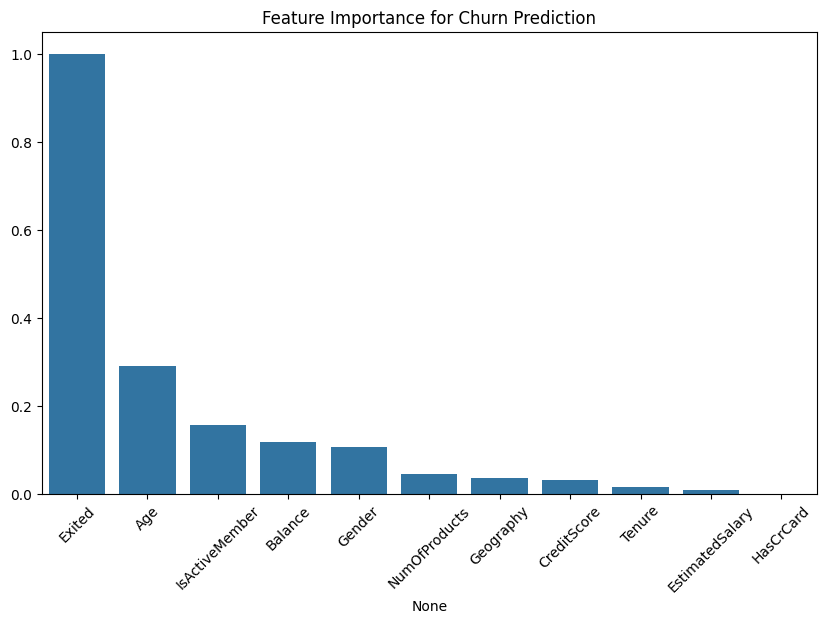

In [46]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = df.corr()['Exited'].abs().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.xticks(rotation=45)
plt.title('Feature Importance for Churn Prediction')
plt.show()

In [ ]:
# Create decision tree model to predict churn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = df.drop(['HasCrCard', 'EstimatedSalary', 'Tenure', 'Exited', 'CreditScore', 'Geography'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1401   57]
 [ 178  164]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1458
           1       0.74      0.48      0.58       342

    accuracy                           0.87      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.86      0.87      0.86      1800



In [48]:
# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(200,100))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Stay', 'Exit'])
plt.show()

In [ ]:
# Hyper parameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    ""
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Best Hyperparameters:", grid_search.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[[1401   57]
 [ 178  164]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1458
           1       0.74      0.48      0.58       342

    accuracy                           0.87      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.86      0.87      0.86      1800

Best Hyperparameters: DecisionTreeClassifier(max_depth=5, random_state=42)


In [55]:
# Random Forest Classifier for churn prediction
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1311  147]
 [ 156  186]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1458
           1       0.56      0.54      0.55       342

    accuracy                           0.83      1800
   macro avg       0.73      0.72      0.72      1800
weighted avg       0.83      0.83      0.83      1800



In [56]:
# Grid Search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[[1403   55]
 [ 175  167]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1458
           1       0.75      0.49      0.59       342

    accuracy                           0.87      1800
   macro avg       0.82      0.73      0.76      1800
weighted avg       0.86      0.87      0.86      1800



In [57]:
# Logistic regression model to predict Outcome and evaluate accuracy
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[1408   50]
 [ 283   59]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1458
           1       0.54      0.17      0.26       342

    accuracy                           0.81      1800
   macro avg       0.69      0.57      0.58      1800
weighted avg       0.78      0.81      0.77      1800



In [60]:
# Grid Search for Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10
    ],
    'solver': ['liblinear', 'saga']
}
grid_search_log = GridSearchCV(estimator=log_model, param_grid=param_grid_log, cv=5, n_jobs=-1, verbose=2)
grid_search_log.fit(X_train, y_train)
best_log_model = grid_search_log.best_estimator_
y_pred_best_log = best_log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best_log))
print(classification_report(y_test, y_pred_best_log))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[[1458    0]
 [ 342    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1458
           1       0.00      0.00      0.00       342

    accuracy                           0.81      1800
   macro avg       0.41      0.50      0.45      1800
weighted avg       0.66      0.81      0.72      1800



c:\Users\ashmi\scoop\apps\python\3.13.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ashmi\scoop\apps\python\3.13.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ashmi\scoop\apps\python\3.13.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 